In [1]:
import tensorflow as tf  
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import randn

In [3]:
# El numero de neuronas de la imagen codificada
layer1_dim = 512
layer2_dim = 256
encoding_dim = 128 

# La imagen de input
input_img = keras.Input(shape=(784,))
# ecoded es la primera capa e la red neuronal
encoded = keras.layers.Dense(layer1_dim, activation='relu')(input_img)
# encoded ahora es la segunda capa e la red neuronal
encoded = keras.layers.Dense(layer2_dim, activation='relu')(encoded)
# encoded es la ultima representacion codificada de la imagen en dimensiones menores
encoded = keras.layers.Dense(encoding_dim, activation='relu')(encoded)

# decoded amplia las dimensiones a layer2_dim
decoded = keras.layers.Dense(layer2_dim, activation='relu')(encoded)
# decoded amplia las dimensiones a layer21_dim
decoded = keras.layers.Dense(layer1_dim, activation='relu')(decoded)
# "decoded" es la reconstruccion de la imagen a partir de la informacion codificada
decoded = keras.layers.Dense(784, activation='sigmoid')(decoded)

# Este es el modelo desde la imagen -> codificacion -> imagen reconstruida
autoencoder = keras.Model(input_img, decoded)

In [4]:
# Este modelo codifica la imagen original 
encoder = keras.Model(input_img, encoded)

In [14]:
# El input es la imagen codificada de dim=128
encoded_input = keras.Input(shape=(encoding_dim,))
# Se recupera la ultima capa del modelo completo de autoencoder
decoder_layer = autoencoder.layers[-3]
# Se crea el modelo de decodificador
decoder = keras.Model(encoded_input, decoder_layer(encoded_input))


TypeError: 'list' object is not callable

In [7]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')


In [8]:
(x_train, _), (x_test, _) = keras.datasets.mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [9]:
autoencoder.fit(x_train, x_train,
                epochs=10,
                batch_size=10,
                shuffle=True,
                validation_data=(x_test, x_test))


Epoch 1/10
6000/6000 [==============================] - 83s 1ms/step - loss: 0.1434 - val_loss: 0.0968
Epoch 2/10
6000/6000 [==============================] - 8s 1ms/step - loss: 0.0951 - val_loss: 0.0904
Epoch 3/10
6000/6000 [==============================] - 8s 1ms/step - loss: 0.0904 - val_loss: 0.0896
Epoch 4/10
6000/6000 [==============================] - 8s 1ms/step - loss: 0.0877 - val_loss: 0.0873
Epoch 5/10
6000/6000 [==============================] - 8s 1ms/step - loss: 0.0861 - val_loss: 0.0857
Epoch 6/10
6000/6000 [==============================] - 8s 1ms/step - loss: 0.0847 - val_loss: 0.0837
Epoch 7/10
6000/6000 [==============================] - 8s 1ms/step - loss: 0.0833 - val_loss: 0.0832
Epoch 8/10
6000/6000 [==============================] - 8s 1ms/step - loss: 0.0825 - val_loss: 0.0820
Epoch 9/10
6000/6000 [==============================] - 8s 1ms/step - loss: 0.0815 - val_loss: 0.0816
Epoch 10/10
6000/6000 [==============================] - 8s 1ms/step - loss: 0.08

In [10]:
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

ValueError: cannot reshape array of size 256 into shape (28,28)

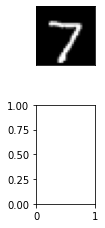

In [11]:
n =16 # How many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [12]:
# Se decodifica un input aleatorio de valores

random_noise_img = randn(encoding_dim).reshape(1,encoding_dim)
print(abs(random_noise_img*5))
decoded_random = decoder.predict(abs(random_noise_img*5))
plt.imshow(decoded_random.reshape(28, 28))

[[ 0.14715768  1.88422051  1.04635292  4.99034371  6.05323658  8.38141325
   1.45822883  4.28619125  0.79091193  3.19669283  6.0772925  12.76231036
   2.32550662  4.3105003   0.1330121   4.85289138  0.56282662  0.47660405
   3.92270483  1.21935589  2.46494921  1.323418    6.67362272  0.4666111
   1.05759705  1.76660746  2.05034463  5.41509075 17.13444997  3.44047385
   2.54108491  9.72975258  4.97849382  2.95837611  8.73640328  3.13001631
   1.80481842  3.0935252   1.97944582  2.40271192  5.32649559  5.268893
  12.63960073  1.75444273  5.32999363  7.35180459  2.88356129  0.91751967
   3.06864156  6.33982652  9.40201623  1.07463885  0.81046337 13.140547
   2.49738795  3.01984516 10.10274214 10.84202091  5.14523667  5.50279018
   1.73137589  7.61179315  6.75346437  1.58244137  1.6596643   0.10382156
   1.3981228   2.72484713  0.93562638  7.01704258  3.50833973  5.84016949
   3.63880061  2.25339416  1.066107    1.10023249  0.65145354  7.13536382
   2.33787442  2.91519813  0.60088799  3.06

ValueError: cannot reshape array of size 256 into shape (28,28)

In [13]:
avrg =[]
for a,b in zip(encoded_imgs[0], encoded_imgs[2]):
    avrg.append((a+b)/2)
avrg = np.array(avrg).reshape(1,encoding_dim)
print(avrg)
avrg_num = decoder.predict(avrg)
plt.imshow(avrg_num.reshape(28,28))

[[0.         0.77583355 0.         0.         2.22363234 0.
  1.35624993 1.42748427 0.         0.         0.         1.09179819
  0.         0.55129808 0.30600104 0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.33767539 0.         1.8754586  0.         0.         0.
  0.17613022 0.87587333 0.         1.8126626  0.74018776 0.
  0.         0.         1.91627705 0.48437059 0.         0.
  0.         0.         0.         0.24327506 1.08609033 0.
  1.38692892 0.         0.         1.18196535 0.         1.3124578
  0.         0.         0.         0.05172423 0.93832016 0.
  0.63123721 0.94754636 0.         1.30081403 2.11264253 0.564089
  0.         0.         0.         0.         0.82021701 0.
  0.         2.18232751 0.         1.42227173 0.         0.98003292
  1.51892424 0.         2.32537556 0.26078194 0.         0.
  1.49077034 0.         0.06179525 1.38445282 0.27145216 0.
  2.3006165  2.61481643 0.60629386 0.         0.         0.
  0.2985980

ValueError: cannot reshape array of size 256 into shape (28,28)